In [380]:
from preamble import *

# Import data, trim, and examine

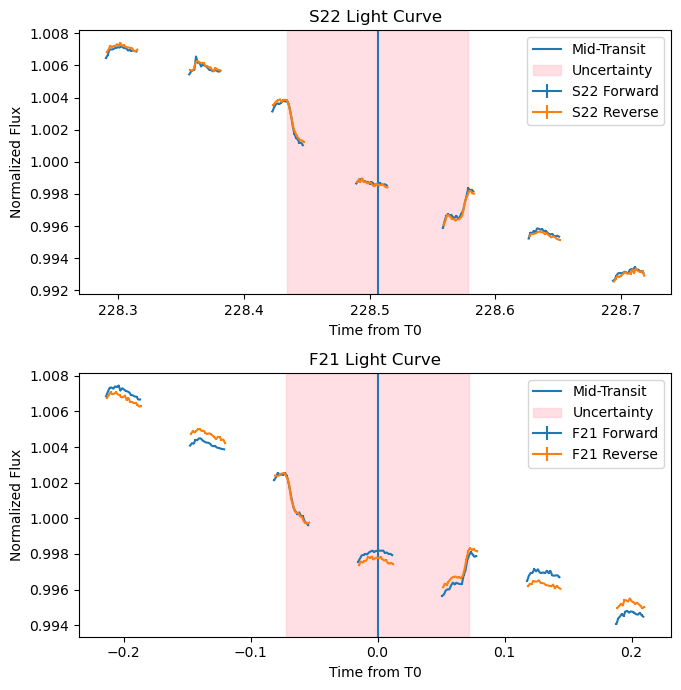

In [391]:
orbits_to_exclude = np.array([0])
predicted_T0 = visits['F21']['T0 (BJD_TDB)'].value
# Create a figure with two subplots stacked vertically
fig, axs = plt.subplots(2, 1, figsize=(7, 7))

# Loop through the visits
for i, visit in enumerate(['S22', 'F21']):
    
    data_fluxes = []
    relative_errs = []
    img_dates = []
    times_from_T0 = []
    wave_arrays = []

    
    for direction in ['Forward', 'Reverse']:
        # Read the rainbow data
        rainbow = read_rainbow(f"../data/{visit}_{direction}_trimmed_pacman_spec.rainbow.npy")
        
        # Calculate broadband flux and its error
        broadband_flux = np.nansum(rainbow.flux.value, axis=0)
        broadband_flux_err = np.sqrt(broadband_flux)
        relative_err = broadband_flux_err / broadband_flux
        
        # Append data to lists
        data_fluxes.append(broadband_flux)
        relative_errs.append(relative_err)
        img_dates.append(rainbow.time.value)
        times_from_T0.append(rainbow.time.value - predicted_T0)
        
    'Label the orbits'
    orbit = np.zeros_like(img_dates[0])
    for j in range(len(img_dates[0])):
        if j >= 1:
            if (img_dates[0][j] - img_dates[0][j - 1]) > 0.01:
                orbit[j] = (orbit[j - 1] + 1)
            else:
                orbit[j] = orbit[j - 1]

    'Trim the first point from each orbit'
    ref_time = []
    for o in np.unique(orbit):  # Skip the 0th orbit
        first_index = np.where(orbit == o)[0][0]
        ref_time.append(img_dates[0][first_index])
        for j in range(2):
            data_fluxes[j][first_index] = np.nan  # Set the first point of each subsequent orbit to np.nan
            relative_errs[j][first_index] = np.nan  # Set the first point of each subsequent orbit to np.nan
            img_dates[j][first_index] = np.nan  # Set the first point of each subsequent orbit to np.nan
            times_from_T0[j][first_index] = np.nan  # Set the first point of each subsequent orbit to np.nan

    # Iterate through orbits to exclude and set corresponding values to NaN
    for orbit_to_exclude in orbits_to_exclude:
        for j in range(2):
            data_fluxes[j][orbit == orbit_to_exclude] = np.nan
            relative_errs[j][orbit == orbit_to_exclude] = np.nan
            img_dates[j][orbit == orbit_to_exclude] = np.nan
            times_from_T0[j][orbit == orbit_to_exclude] = np.nan
        
    T0_array = [27*8.463+0.0054, 0]
    T0_unc_array = [0.0722,0.0722]
    for j, direction in enumerate(['Forward', 'Reverse']):
        axs[i].errorbar(times_from_T0[j], 
                        data_fluxes[j] / np.nanmean(data_fluxes[j]), 
                        relative_errs[j], 
                        label=f'{visit} {direction}')
    axs[i].axvline(T0_array[i],label='Mid-Transit')
    axs[i].axvspan(T0_array[i]-T0_unc_array[i],T0_array[i]+T0_unc_array[i],label='Uncertainty',color='pink',alpha=0.5,zorder=-100)
    
    # Set labels and titles for each subplot
    axs[i].set_xlabel('Time from T0')
    axs[i].set_ylabel('Normalized Flux')
    axs[i].set_title(f'{visit} Light Curve')
    axs[i].legend()
    # axs[i].set_ylim(0.9,1.1)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig(f'../figs/trimmed_pacman_whitelightcurves.png',dpi=300)
plt.show()

In [384]:
Rs = 0.8 * u.R_sun
log_g = calculate_logg(Rs.value)
T_eq = 600
M_p = 10.2 * u.R_earth 
orbits_to_exclude = np.array([0])

F21_params={
    # Ramp Model Parameters
    "r1": 17.32,
    "r2": -6.64,
    "r3": 6.7e-5,
    # Transit Parameters
    "T_0":0.0,
    "u1": 0.208,
    "u2": 0.37,
    "R_0": 3.6,
    "a_rstar": 18.2,
    "ecc": 0.06,
    'planet_i': 89.5, # Range from 85 to 90 deg, or 1.47-1.57radians
    # Stellar Parameters
    "T_spot": 3100,
    "T_phot": 4000,
    "spot1_lon": -1.291,
    "spot1_lat": 0.59,
    "spot1_rad": 0.644,
    "spot2_lon": 0.06,
    "spot2_lat": 1.269,
    "spot2_rad": 0.457,
    "spot3_lon": 1.237,
    "spot3_lat": 2.52,
    "spot3_rad": 0.515,
    "spot4_lon": 0.844,
    "spot4_lat": 1.781,
    "spot4_rad": 0.0,
}

S22_params={
    # Ramp Model Parameters
    "r1": 17.32,
    "r2": -6.64,
    "r3": 0.00014,
    # Transit Parameters
    "T_0":0.0,
    "u1": 0.23,
    "u2": 0.39,
    "R_0": 3.66,
    "a_rstar": 18.2,
    "ecc": 0.05,
    'planet_i': 89.5, # Range from 85 to 90 deg, or 1.47-1.57radians
    # Stellar Parameters
    "T_spot": 3130,
    "T_phot": 4030,
    "spot1_lon": -1.285,
    "spot1_lat": 0.69,
    "spot1_rad": 0.645,
    "spot2_lon": 0.13,
    "spot2_lat": 1.285,
    "spot2_rad": 0.45,
    "spot3_lon": 1.21,
    "spot3_lat": 2.545,
    "spot3_rad": 0.53,
    "spot4_lon": 0.836,
    "spot4_lat": 1.785,
    "spot4_rad": 0.057,
}

ndim = len(F21_params)
bin_edges = np.array([0.81, 1.13, 1.64])*u.micron

# Initialize the data and models

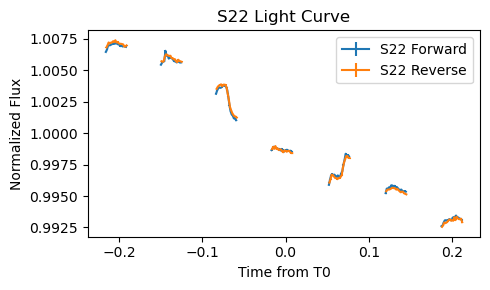

In [386]:
visit = 'S22'
params = S22_params
predicted_T0 = visits[f'{visit}']['T0 (BJD_TDB)'].value
data_fluxes = []
relative_errs = []
img_dates = []
times_from_T0 = []
wave_arrays = []

for direction in ['Forward', 'Reverse']:
    # Read the rainbow data
    rainbow = read_rainbow(f"../data/{visit}_{direction}_trimmed_pacman_spec.rainbow.npy")
    
    # Calculate broadband flux and its error
    broadband_flux = np.nansum(rainbow.flux.value, axis=0)
    broadband_flux_err = np.sqrt(broadband_flux)
    relative_err = broadband_flux_err / broadband_flux
    
    # Append data to lists
    data_fluxes.append(broadband_flux)
    relative_errs.append(relative_err)
    img_dates.append(rainbow.time.value)
    times_from_T0.append(rainbow.time.value - predicted_T0)
    
'Label the orbits'
orbit = np.zeros_like(img_dates[0])
for j in range(len(img_dates[0])):
    if j >= 1:
        if (img_dates[0][j] - img_dates[0][j - 1]) > 0.01:
            orbit[j] = (orbit[j - 1] + 1)
        else:
            orbit[j] = orbit[j - 1]

'Trim the first point from each orbit'
ref_time = []
for o in np.unique(orbit):  # Skip the 0th orbit
    first_index = np.where(orbit == o)[0][0]
    ref_time.append(img_dates[0][first_index])
    for j in range(2):
        data_fluxes[j][first_index] = np.nan  # Set the first point of each subsequent orbit to np.nan
        relative_errs[j][first_index] = np.nan  # Set the first point of each subsequent orbit to np.nan
        img_dates[j][first_index] = np.nan  # Set the first point of each subsequent orbit to np.nan
        times_from_T0[j][first_index] = np.nan  # Set the first point of each subsequent orbit to np.nan

'Iterate through orbits to exclude and set corresponding values to NaN'
for orbit_to_exclude in orbits_to_exclude:
    for j in range(2):
        data_fluxes[j][orbit == orbit_to_exclude] = np.nan
        relative_errs[j][orbit == orbit_to_exclude] = np.nan
        img_dates[j][orbit == orbit_to_exclude] = np.nan
        times_from_T0[j][orbit == orbit_to_exclude] = np.nan
    
'Plot'
plt.figure(figsize=(5,3))
for j, direction in enumerate(['Forward', 'Reverse']):
    plt.errorbar(times_from_T0[j],
                 data_fluxes[j] / np.nanmean(data_fluxes[j]), 
                 relative_errs[j],
                 label=f'{visit} {direction}')
plt.xlabel('Time from T0')
plt.ylabel('Normalized Flux')
plt.title(f'{visit} Light Curve')
plt.legend()
plt.tight_layout()
plt.show()

'Set up the planet and star'
'Set binning preferences and download model spectra'
kwargs = dict(
bin_specification = 'edges',
bins=bin_edges,
min=bin_edges.min(),
max=bin_edges.max(), log=False)
Cool, Phot = [
    bin_spectrum(
        get_spectrum(T_eff=Temp, log_g=log_g, Z=0.12, cache=True), **kwargs
    )
    for Temp in [params["T_spot"], params["T_phot"]] ]

'Initialize planet parameters and the active_star'
planet_parameters = dict(
    inclination = np.radians(params['planet_i']),
    a = params['a_rstar'],
    rp = (params['R_0']*u.R_earth/Rs).decompose(),
    period = 8.463,
    t0 = 0.0,
    ecc = params['ecc'],
    u1 = params['u1'],
    u2 = params['u2'] )
active_star = ActiveStar(
    times=times_from_T0[0], # use data time array
    inclination=np.pi/2,  # stellar inc [rad]
    T_eff=Phot.meta['PHXTEFF'],
    wavelength=Phot.wavelength.to_value(u.m), #use data wavelength array
    phot=Phot.flux.value, #This is the model spectrum for the photosphere temp
    P_rot=4.863 )
spot1 = dict(
    lon= params['spot1_lon'],  # [rad]
    lat= params['spot1_lat'],  # [rad]
    rad=params['spot1_rad'],  # [R_star]
    spectrum=Cool.flux.value,
    temperature=Cool.meta['PHXTEFF'] )
spot2 = dict(
    lon= params['spot2_lon'],  # [rad]
    lat= params['spot2_lat'],  # [rad]
    rad=params['spot2_rad'],  # [R_star]
    spectrum=Cool.flux.value,
    temperature=Cool.meta['PHXTEFF'] )
spot3 = dict(
    lon= params['spot3_lon'],  # [rad]
    lat= params['spot3_lat'],  # [rad]
    rad=params['spot3_rad'],  # [R_star]
    spectrum=Cool.flux.value,
    temperature=Cool.meta['PHXTEFF'] )
spot4 = dict(
    lon= params['spot4_lon'],  # [rad]
    lat= params['spot4_lat'],  # [rad]
    rad=params['spot4_rad'],  # [R_star]
    spectrum=Cool.flux.value,
    temperature=Cool.meta['PHXTEFF'] )

for spot in [spot1,spot2,spot3,spot4]:
    active_star.add_spot(**spot)

# Determine the best-fit ramp parameters

Optimized parameters: r1=17.872849, r2=-6.8158, r3=-0.00157


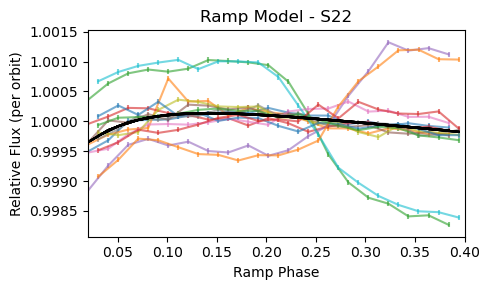

<Figure size 640x480 with 0 Axes>

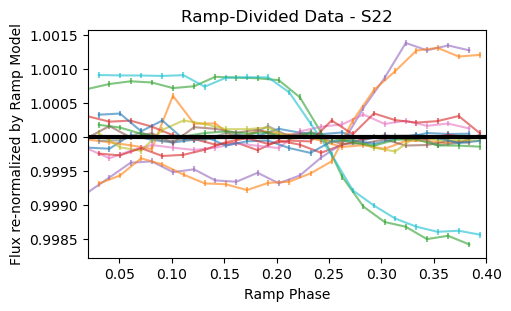

<Figure size 640x480 with 0 Axes>

In [14]:
# def ramp_residuals(params):
#     r1, r2, r3 = params
#     residuals = []
#     for i in [0, 1]:
#         ramp_phases = []
#         for o in [0, 1, 2, 3, 4, 5, 6, 7]:
#             rphase = (img_dates[i][orbit == o] - ref_time[o]) / hst_per_in_days
#             ramp_phases.append(rphase)
#         rphase = np.concatenate(ramp_phases)
        
#         ramp = ramp_model(r1, r2, r3, rphase)
#         ramp /= np.nanmean(ramp)
        
#         # Calculate the residuals (difference between model and data)
#         for o in [1, 2, 4, 6, 7]:
#             this_orbit_model = ramp[orbit == o]
#             this_orbit_data = data_fluxes[i][orbit == o] / np.nanmean(data_fluxes[i][orbit == o])
#             residuals.extend((this_orbit_model - this_orbit_data).flatten())

#     # Return the sum of squared residuals
#     return np.nansum(np.array(residuals) ** 2)

# # Initial guess for r1, r2, r3
# initial_params = [10, -6, -0.007]

# # Minimize the cost function
# result = minimize(ramp_residuals, initial_params,method='Nelder-Mead')

# # Extract the optimized parameters
# optimized_params = result.x
# params['r1'], params['r2'], params['r3'] = optimized_params

# # Print the optimized parameters
# print(f"Optimized parameters: r1={params['r1']:4f}, r2={params['r2']:.4f}, r3={params['r3']:.5f}")

# # Plot the data and the optimized ramp model
# plt.figure(figsize=(5, 3))

# for i in [0, 1]:
#     ramp_phases = []
#     for o in [0, 1, 2, 3, 4, 5, 6, 7]:
#         rphase = (img_dates[i][orbit == o] - ref_time[o]) / hst_per_in_days
#         ramp_phases.append(rphase)
#     rphase = np.concatenate(ramp_phases)
    
#     ramp = ramp_model(params['r1'], params['r2'], params['r3'], rphase)
#     ramp /= np.nanmean(ramp)
    
#     # Plot the model and data
#     for o in [1,2,3,4, 5,6, 7]:
#         plt.plot(rphase[orbit == o], ramp[orbit == o], color='k', zorder=100)
#         plt.errorbar(rphase[orbit == o], data_fluxes[i][orbit == o] / np.nanmean(data_fluxes[i][orbit == o]), relative_errs[i][orbit == o],
#                      alpha=0.6)

# plt.title(f'Ramp Model - {visit}')
# plt.xlim(0.02,0.4)
# plt.ylabel('Relative Flux (per orbit)')
# plt.xlabel('Ramp Phase')
# plt.tight_layout()
# plt.savefig(f'../figs/{visit}_data_withramp.png',dpi=300)
# plt.show()
# plt.clf()

# 'Create a new figure for the ramp-divided and mean-normalized data'
# plt.figure(figsize=(5,3))
# plt.title(f'Ramp-Divided Data - {visit}')

# for i in [0, 1]:
#     ramp_phases = []
#     for o in [0, 1, 2, 3, 4, 5, 6, 7]:
#         rphase = (img_dates[i][orbit == o] - ref_time[o]) / hst_per_in_days
#         ramp_phases.append(rphase)
#     rphase = np.concatenate(ramp_phases)

#     breath_phase = np.array( (img_dates[i] - ref_time[0]+0.02) % hst_per_in_days)
    
#     # Compute the best-fit ramp model
#     ramp = ramp_model(params['r1'], params['r2'], params['r3'], rphase)
#     ramp /= np.nanmean(ramp)
    
#     # Divide the data by the ramp model and mean-normalize
#     for o in [1, 2, 3, 4, 5, 6, 7]:
#         # Divide the data by the ramp model
#         ramp_divided_data = (data_fluxes[i][orbit == o]/np.nanmean(data_fluxes[i][orbit == o])) / ramp[orbit == o]
        
#         # Mean-normalize the ramp-divided data
#         # ramp_divided_data /= np.nanmean(ramp_divided_data)
        
#         # Plot the ramp-divided and mean-normalized data
#         plt.errorbar(rphase[orbit == o], ramp_divided_data, relative_errs[i][orbit == o], alpha=0.6)

# plt.axhline(1.0,color='k',linewidth=3,zorder=100)
# plt.xlim(0.02,0.4)
# plt.xlabel('Ramp Phase')
# plt.ylabel('Flux re-normalized by Ramp Model')
# fig.tight_layout()
# plt.savefig(f'../figs/{visit}_data_ramp_normalized.png',dpi=300)
# plt.show()
# plt.clf()

# Test the spot parameters with this ramp model

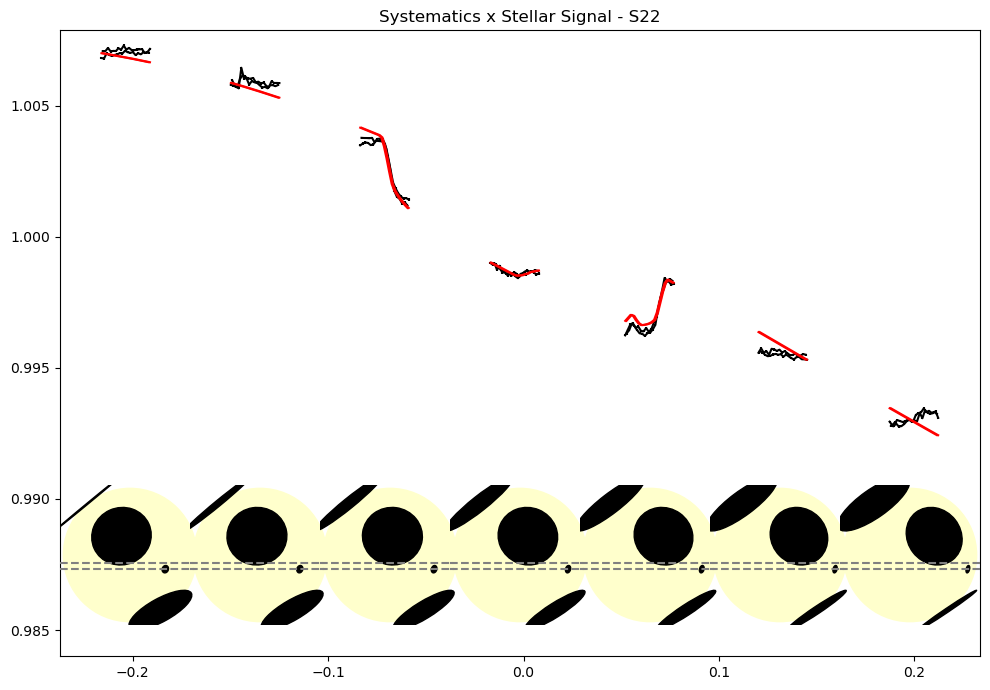

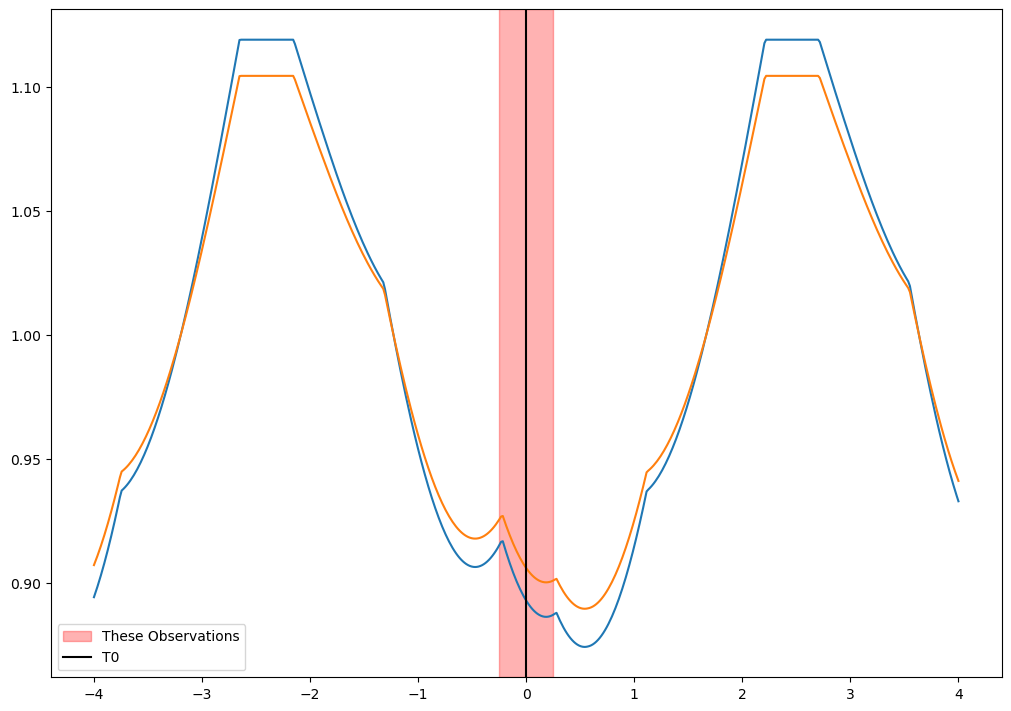

<Figure size 640x480 with 0 Axes>

In [328]:
# chord, pole, other
active_star.times = times_from_T0[0]

'Central spot, grazes transit chord'
params["spot1_lon"]= 0.13 # right/left
params["spot1_lat"]= 1.285 # up/down
params["spot1_rad"]= 0.45
'Transit chord spot'
params["spot3_lon"]= 0.836
params["spot3_lat"]= 1.785
params["spot3_rad"]= 0.057

'This is a large polar spot coming into view, driving the dimming'
params["spot2_lon"]= -1.285
params["spot2_lat"]= 0.69
params["spot2_rad"]= 0.645
'This spot on the bottom is rotating out of view'
params["spot4_lon"]= 1.21
params["spot4_lat"]= 2.545
params["spot4_rad"]= 0.53

active_star.lon = jnp.array([params['spot1_lon'],params['spot2_lon'],params['spot3_lon'],params['spot4_lon']]) #[-pi,pi]
active_star.lat = jnp.array([params['spot1_lat'],params['spot2_lat'],params['spot3_lat'],params['spot4_lat']]) #[0,pi]
active_star.rad = jnp.array([params['spot1_rad'],params['spot2_rad'],params['spot3_rad'],params['spot4_rad']]) #[0,0.5]
# planet_parameters["a"] = 17.5
# planet_parameters["ecc"] = 0.09
planet_parameters["rp"] = (3.9*u.R_earth/Rs).decompose()

'Calculate the transit model'
lc, contam, X, Y, spectrum_at_transit = active_star.transit_model(**planet_parameters)
if visit == 'S22':
    lc_i = lc.T[0]  # Use the first component for S22
elif visit == 'F21':
    lc_i = lc.T[1]
lc_i/=np.nanmean(lc_i)

'set up the plot'
fig, ax = plt.subplots(figsize=(10, 7))  # Increase figure height to accommodate white space

for i in [0, 1]:
    ramp_phases = []
    for o in [0, 1, 2, 3, 4, 5, 6, 7]:
        rphase = (img_dates[i][orbit == o] - ref_time[o]) / hst_per_in_days
        ramp_phases.append(rphase)
    rphase = np.concatenate(ramp_phases)
    
    # Compute the best-fit ramp model
    ramp = ramp_model(params['r1'], params['r2'], params['r3'], rphase)
    model = ramp*lc_i
    model/=np.nanmean(model)
    relative_flux = data_fluxes[i] / np.nanmean(data_fluxes[i])
    _rampdivided = relative_flux/ramp # Plot the systematics and data
    systematics_remvoved_flux = _rampdivided/np.nanmean(_rampdivided)
    ax.set_title(f'Systematics x Stellar Signal - {visit}')
    ax.plot(times_from_T0[i], lc_i, color='red', zorder=100)
    ax.errorbar(times_from_T0[i], systematics_remvoved_flux, relative_errs[i], color='k')
    ax.set_ylim(0.984,None)
    
# Define the times at which to plot the stars
times_to_plot = [np.nanmean(times_from_T0[0][orbit == o]) for o in [1, 2, 3, 4, 5, 6, 7]]

# Plot stars at their respective times
for i, time in enumerate(times_to_plot):
    # Create a subplot for the star plot at the bottom
    star_ax = fig.add_axes([(0.13)*i-0.115, 0.1, 0.5, 0.2], frameon=False)  # Position dynamically`    # star_ax.set_xlim(ax.get_xlim())  # Match the x-axis limits with the main plot
    star_ax.set_ylim(0, 1)  # Set y-axis limits for the star plot
    star_ax.axis('off')  # Hide the axes

    # Plot the star at the specified time
    active_star.plot_star(
        t0=time,
        rp=planet_parameters['rp'],
        a=planet_parameters['a'],
        inclination=planet_parameters['inclination'],
        ax=star_ax
    )
# Adjust layout for better spacing
plt.tight_layout()
# Show the figure
plt.show()

plt.figure(figsize=(10,7) )
'Plot the whole stellar rotation phase'
active_star.times = np.linspace(-4,4,500)
rot = active_star.rotation_spectrum()
for rotation in rot.T:
    plt.plot(active_star.times, rotation/rotation.mean())
plt.axvspan(-0.25,0.25,color='red',alpha=0.3,label='These Observations')
plt.axvline(0,color='k',label='T0')
plt.legend()
plt.show()
plt.clf()

## Breathing

In [20]:
def breathing(b1=1.03667671e-02,
              b2=4.32624068e-02,
              b3=-3.46439646e-01,
              b4=6.20509213e-01, t=None):

    hst_orbital_period = 95.7 # minutes
    hst_per_in_days = hst_orbital_period * (1./60.) * (1./24.)
    
    phase1 = (t - ref_time[0] + 0.02) / hst_per_in_days     # the data point at time "epoch" will be the zero-point; convert int phase by division through period
    phase2 = np.floor(phase1)            # identify integer intervals of phase (where phase is between 0-1, between 1-2, between 2-3 and over 3)
    phase = phase1 - phase2              # make phase be in interval from 0 to 1
    toobig = np.where(phase > 0.5)[0]    # figure out where phase is bigger than 0.5
    if toobig.size > 0:
        phase[toobig] -= 1.0                 # where it is bigger than 0.5, subtract one to get to interval [-0.5, 0.5]
    
    breathing = b1*phase + b2*phase**2 + b3*phase**3 + b4*phase**4
    
    return breathing

## Wavelength Offset Model

In [ ]:
def wavelength_offset(l1=0,l2=0,l3=0,l4=0,sh=None, t=None):

    hst_orbital_period = 95.7 # minutes
    hst_per_in_days = hst_orbital_period * (1./60.) * (1./24.)

    phase1 = (t - ref_time[0] + 0.02) / hst_per_in_days     # the data point at time "epoch" will be the zero-point; convert int phase by division through period
    phase2 = np.floor(phase1)            # identify integer intervals of phase (where phase is between 0-1, between 1-2, between 2-3 and over 3)
    phase = phase1 - phase2              # make phase be in interval from 0 to 1
    toobig = np.where(phase > 0.5)[0]    # figure out where phase is bigger than 0.5
    if toobig.size > 0:
        phase[toobig] -= 1.0                 # where it is bigger than 0.5, subtract one to get to interval [-0.5, 0.5]
    
    model = l1*sh + l2*sh**2 + l3*sh**3 + l4*sh**4
    
    return breathing

# BT-SETTL Interpolator (needs testing)

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import pandas as pd
from glob import glob
from scipy.stats import binned_statistic
import astropy.units as u
from tensorflow_probability.substrates.jax.math import batch_interp_rectilinear_nd_grid as nd_interp


def bt_settl_model_spectra(bin_wl, path=None):
    if path is None:
        path = '/Users/bmmorris/data/model_spectra/bt_settl/lte*.txt'

    paths = glob(path)
    bt_settl_temperature_grid = {}

    for i, path in enumerate(paths):
        with open(path, 'r') as w:
            temperature = int(w.read(1000).splitlines()[1].split('=')[1].split(' ')[1])
        bt_settl_temperature_grid[temperature] = path

    bt_settl_grid = np.zeros((len(bt_settl_temperature_grid), len(bin_wl)-1))

    bt_settl_temperature_grid_keys = np.sort(list(bt_settl_temperature_grid.keys())).astype(np.float64)

    for i, temp in enumerate(bt_settl_temperature_grid_keys):
        path = bt_settl_temperature_grid[temp]
        spectrum = pd.read_csv(
            path,
            comment='#',
            delimiter='\s+',
            names=['wavelength', 'flux']
        )

        bt_settl_grid[i] = binned_statistic(
            (spectrum['wavelength'].values * u.AA).to(u.um).value, spectrum['flux'].values,
            bins=bin_wl, statistic=np.nanmean
        ).statistic

    return bt_settl_temperature_grid_keys, bt_settl_grid


def get_interp_stellar_spectrum(bin_wl, path=None):

    bt_settl_temperature_grid_keys, bt_settl_grid = bt_settl_model_spectra(bin_wl, path)

    x_grid_points = (
        bt_settl_temperature_grid_keys.astype(jnp.float32), 
        bin_wl[:-1].astype(jnp.float32)
    )

    @jit
    def interp(interp_temperature):
        ones = jnp.ones_like(bin_wl[:-1])
        interp_point = jnp.column_stack([
            interp_temperature * ones,
            bin_wl[:-1]
        ]).astype(jnp.float32)

        return nd_interp(
            interp_point,
            x_grid_points,
            bt_settl_grid.astype(jnp.float32),
            axis=0
        )

    return interp